In [18]:
# df = pd.read_csv('../raw_data/df_grouped_rate.csv',encoding='utf-8' )
df = pd.read_csv('../raw_data/df_grouped_rate.csv',encoding='utf-8' )

In [19]:
idx = np.random.randint(0,len(df),size=10)  #표본추출할때 사용

In [20]:
X=df[df.columns[3:]].iloc[idx]
y=df["district"].iloc[idx]
X=np.array(X)
y=np.array(y)


In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram
import pickle
from sklearn.externals import joblib

Z = linkage(X, 'ward')  #와드거리

saved_model = pickle.dumps(Z)
joblib.dump(saved_model, 'sci_h_clust.pkl') #피클파일 저장

# Z = joblib.load('filename.pkl')  #load


['sci_h_clust.pkl']

## dendrogram 1

In [22]:
# Plot the dendrogram, using varieties as labels
fig=plt.figure(figsize=(40,20))
dendrogram(Z,
           labels = y,
           leaf_rotation=30,
           leaf_font_size=30,
)
plt.show()


In [ ]:
# fig.savefig('dend_1.png', transparent=True) #png 파일로 저장

## dendrogram 2

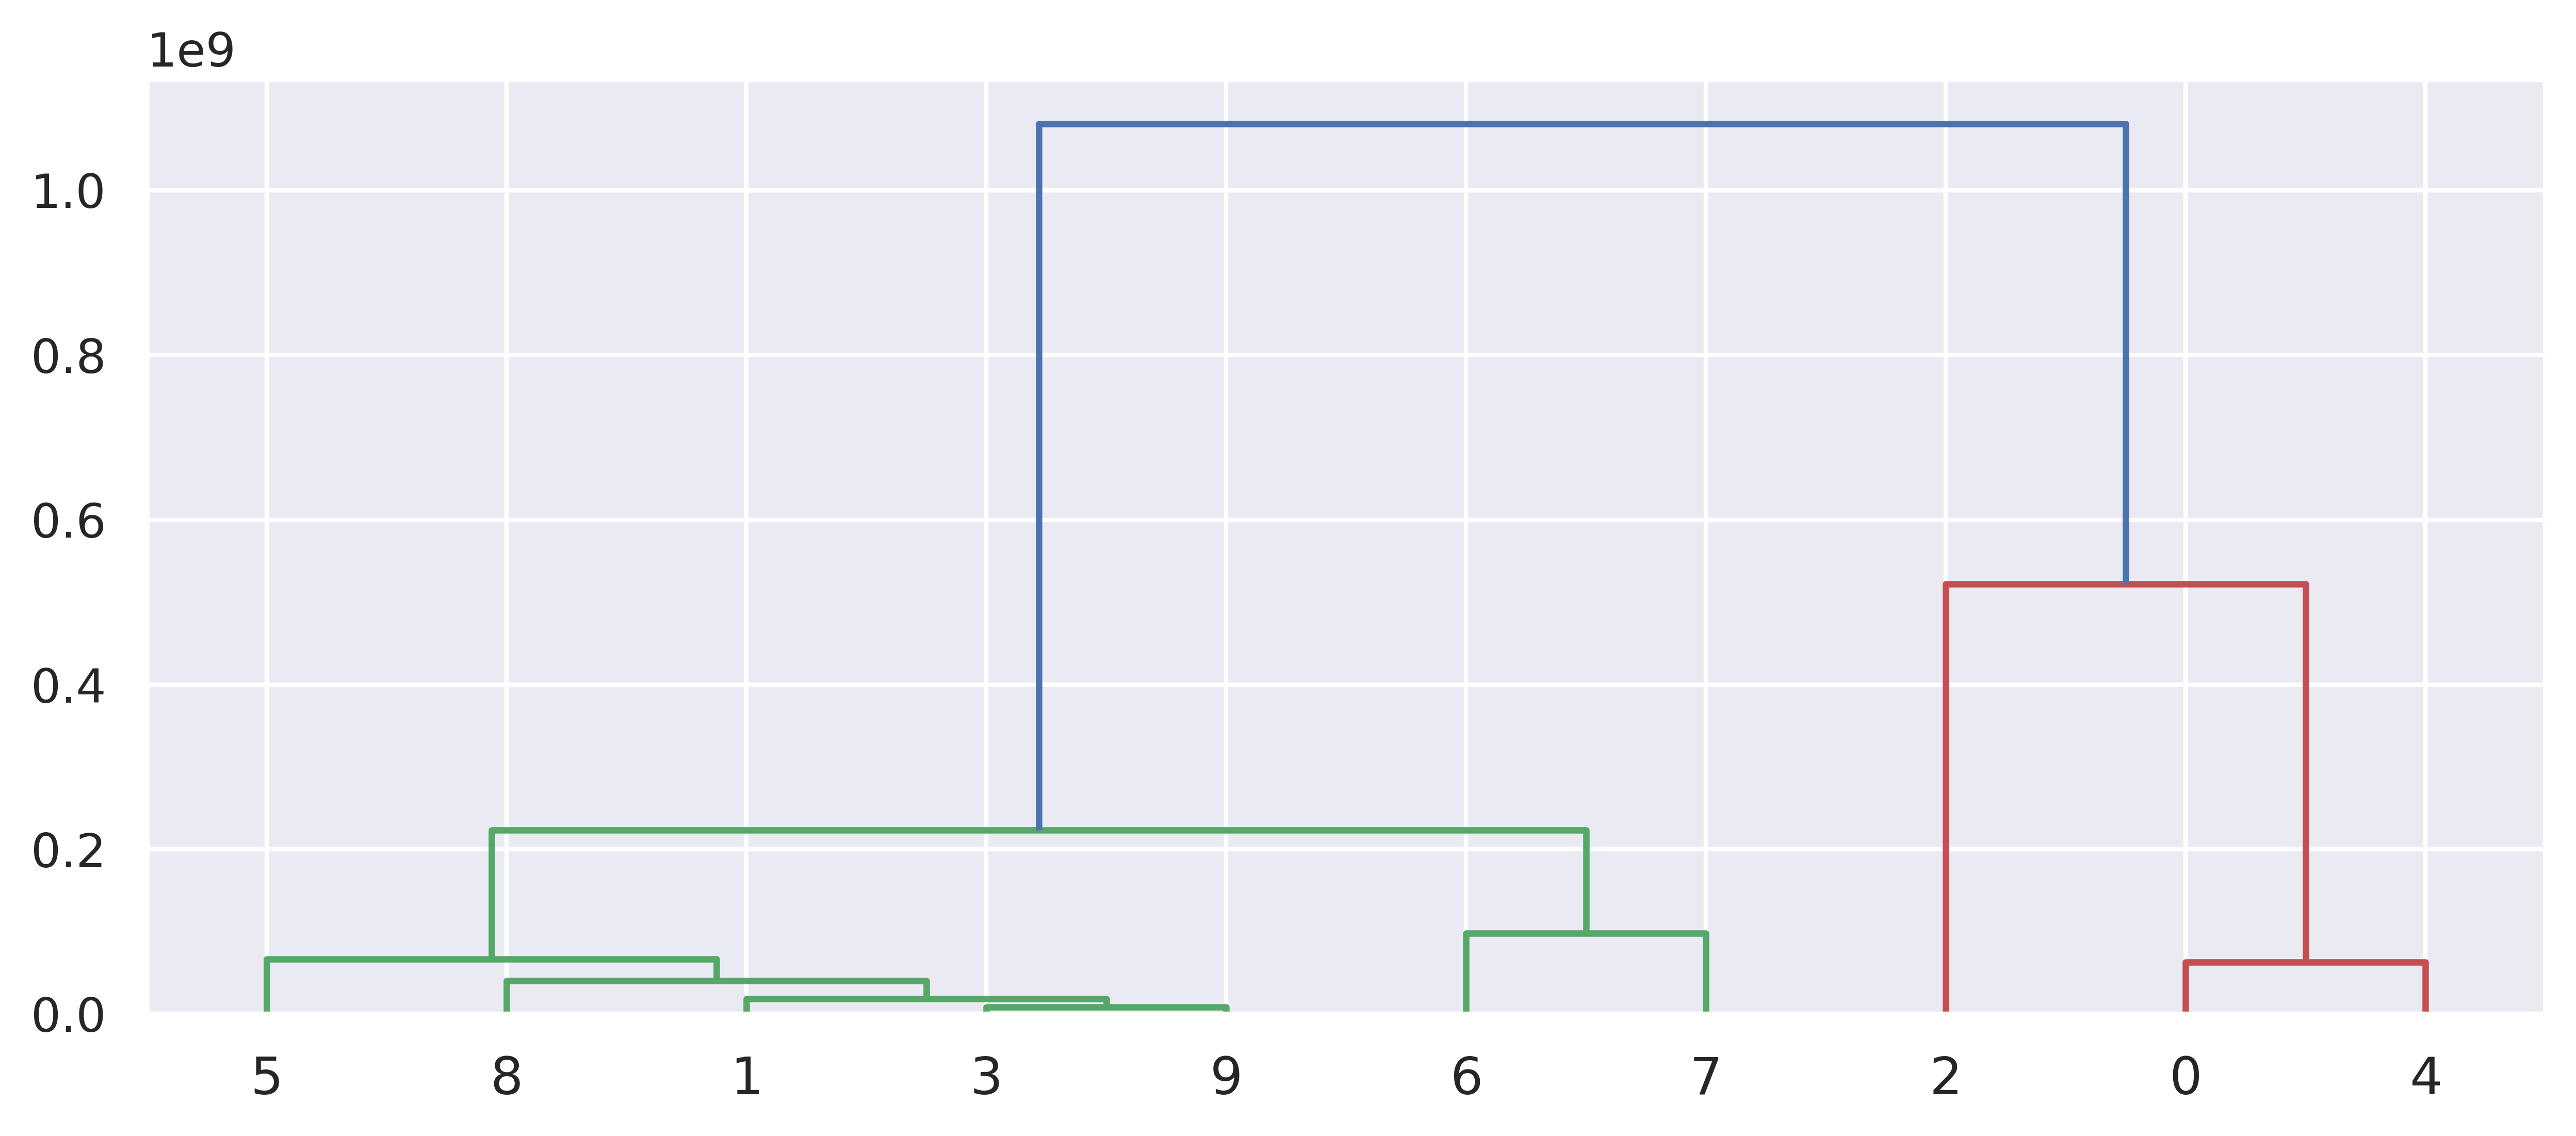

In [23]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

fig=plt.figure(figsize=(10, 4))
ax = plt.subplot()

ddata = dendrogram(Z)

dcoord = np.array(ddata["dcoord"])
icoord = np.array(ddata["icoord"])
leaves = np.array(ddata["leaves"])
idx = np.argsort(dcoord[:, 2])
dcoord = dcoord[idx, :]
icoord = icoord[idx, :]
idx = np.argsort(Z[:, :2].ravel())
label_pos = icoord[:, 1:3].ravel()[idx][:20]

fig.savefig('dend_2.png', transparent=True) #png파일로 저장

plt.show()

In [ ]:
# 

### sklearn으로 계층적 군집화

In [138]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=10)

model = model.fit(Z)
saved_model = pickle.dumps(model)
joblib.dump(clf, 'skl_h_clust.pkl') #피클파일 저장
model.n_clusters_
# model.n_connected_components_
# model.n_leaves_
list(zip(y,model.labels_))



[(1000601, 1),
 (1000740, 1),
 (1000075, 1),
 (1000852, 1),
 (1000290, 1),
 (1000426, 1),
 (1000557, 1),
 (1000552, 1),
 (1000693, 1),
 (1000077, 1),
 (1000386, 1),
 (1000891, 3),
 (1000529, 3),
 (1000252, 3),
 (1000761, 3),
 (1000305, 3),
 (1000631, 2),
 (1000167, 2),
 (1000418, 2),
 (1000290, 6),
 (1000234, 6),
 (1000756, 6),
 (1000885, 0),
 (1000252, 0),
 (1000316, 7),
 (1000162, 9),
 (1000828, 5),
 (1000111, 8),
 (1000782, 4)]

### 여기 아래는 무시해주세요!

In [40]:
result

,0,1,district,cgoongoo,상권_코드_명
0,0,1000999,1000999,11740,진황도로27길
1,1,1000351,1000351,11305,한천로140길
2,2,1000577,1000577,11500,공항대로59길
3,3,1000843,1000843,11620,소담길
4,4,1000720,1000720,11560,양평로22라길
5,5,1000740,1000740,11590,동작대로29길
6,6,1000689,1000689,11560,당산로37길
7,7,1000049,1000049,11140,퇴계로90길
8,17,1000049,1000049,11140,퇴계로90길
9,8,1000121,1000121,11200,용답29길


In [50]:
y_list=list(enumerate(y))

In [51]:
cgoongoo = pd.read_csv('../raw_data/cgoongoo1.csv',encoding='utf-8' )
cgoongoo.tail()

,district,cgoongoo
1491,1001044,11650
1492,1001030,11650
1493,1001031,11620
1494,1001032,11620
1495,1001033,11650


In [52]:
d_name = pd.read_csv('../raw_data/district_name.csv',encoding='euc-kr' )
d_name.tail()

,상권_코드,상권_코드_명
1484,1001492,명동 남대문 북창동 다동 무교동 관광특구
1485,1001493,동대문패션타운 관광특구
1486,1001494,종로·청계 관광특구
1487,1001495,잠실 관광특구
1488,1001496,강남 마이스 관광특구


In [53]:
d_name_final=cgoongoo.merge(d_name, left_on='district', right_on='상권_코드',  suffixes=('_left', '_right'))
d_name_final=d_name_final[['district', 'cgoongoo','상권_코드_명']]

In [54]:
result=pd.DataFrame(y_list).merge(d_name_final,how='inner',left_on=1, right_on='district',  suffixes=('_left', '_right') )

In [98]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()